## Import Libraries You Need

In [2]:
import requests
import pandas as pd
import numpy as np
import datetime
import pymysql
from ggplot import *
from configparser import ConfigParser
import json
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

/Users/brosskatz/anaconda3/envs/requests36/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)
/Users/brosskatz/anaconda3/envs/requests36/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/brosskatz/anaconda3/envs/requests36/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


## Grab Credentials Securely

### Using ConfigParser

In [7]:
config = ConfigParser()
config_file = 'config.ini'
config.read(config_file)

user = config['rds']['user']
password = config['rds']['pw']
hostname = config['rds']['host']
db_name = config['rds']['dbname']

api_key = config['quandl']['api_key']

## Connect to MySQL Database

In [5]:
connection = pymysql.connect(host=hostname,
                             user=user,
                             password=password,
                             db=db_name)

In [6]:
cursor = connection.cursor()

In [42]:
engine = create_engine('mysql://'+user+':'+password+'@'+hostname+':3306/'+db_name)

## Import CSV into Pandas DataFrame

In [1]:
stock_tickers_df = pd.read_csv('stock_ticker_list.csv')

NameError: name 'pd' is not defined

#### View First 10 Rows

In [10]:
stock_tickers_df[:10]

,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,industry,Summary Quote
0,DDD,3D Systems Corporation,21.11,$2.4B,NaN,Technology,Computer Software: Prepackaged Software,http://www.nasdaq.com/symbol/ddd
1,MMM,3M Company,205.41,$122.68B,NaN,Health Care,Medical/Dental Instruments,http://www.nasdaq.com/symbol/mmm
2,WBAI,500.com Limited,9.51,$388.38M,2013.0,Consumer Services,Services-Misc. Amusement & Recreation,http://www.nasdaq.com/symbol/wbai
3,WUBA,58.com Inc.,43.00,$6.25B,2013.0,Technology,"Computer Software: Programming, Data Processing",http://www.nasdaq.com/symbol/wuba
4,AHC,A.H. Belo Corporation,5.35,$116.26M,NaN,Consumer Services,Newspapers/Magazines,http://www.nasdaq.com/symbol/ahc
5,ATEN,"A10 Networks, Inc.",8.43,$584.51M,2014.0,Technology,Computer Communications Equipment,http://www.nasdaq.com/symbol/aten
6,AAC,"AAC Holdings, Inc.",6.28,$151.17M,2014.0,Health Care,Medical Specialities,http://www.nasdaq.com/symbol/aac
7,AIR,AAR Corp.,35.04,$1.2B,NaN,Capital Goods,Aerospace,http://www.nasdaq.com/symbol/air
8,AAN,"Aaron&#39;s, Inc.",38.41,$2.79B,NaN,Technology,Diversified Commercial Services,http://www.nasdaq.com/symbol/aan
9,ABB,ABB Ltd,25.54,$54.75B,NaN,Consumer Durables,Electrical Products,http://www.nasdaq.com/symbol/abb


#### Look at only one column

In [11]:
stock_tickers_df['Symbol'][:10]

0     DDD
1     MMM
2    WBAI
3    WUBA
4     AHC
5    ATEN
6     AAC
7     AIR
8     AAN
9     ABB
Name: Symbol, dtype: object

#### Convert DataFrame Records to Various Data Formats

In [12]:
stock_tickers_df['Name'].tolist()[:10]

['3D Systems Corporation',
 '3M Company',
 '500.com Limited',
 '58.com Inc.',
 'A.H. Belo Corporation',
 'A10 Networks, Inc.',
 'AAC Holdings, Inc.',
 'AAR Corp.',
 'Aaron&#39;s,  Inc.',
 'ABB Ltd']

#### Convert DataFrame to JSON Records

In [35]:
print(
    json.dumps(
        json.loads(
            stock_tickers_df[:5].to_json(orient='records')
        ),indent=4)
)

[
    {
        "Symbol": "DDD",
        "Name": "3D Systems Corporation",
        "LastSale": 21.11,
        "MarketCap": "$2.4B",
        "IPOyear": null,
        "Sector": "Technology",
        "industry": "Computer Software: Prepackaged Software",
        "Summary Quote": "http://www.nasdaq.com/symbol/ddd"
    },
    {
        "Symbol": "MMM",
        "Name": "3M Company",
        "LastSale": 205.41,
        "MarketCap": "$122.68B",
        "IPOyear": null,
        "Sector": "Health Care",
        "industry": "Medical/Dental Instruments",
        "Summary Quote": "http://www.nasdaq.com/symbol/mmm"
    },
    {
        "Symbol": "WBAI",
        "Name": "500.com Limited",
        "LastSale": 9.51,
        "MarketCap": "$388.38M",
        "IPOyear": 2013.0,
        "Sector": "Consumer Services",
        "industry": "Services-Misc. Amusement & Recreation",
        "Summary Quote": "http://www.nasdaq.com/symbol/wbai"
    },
    {
        "Symbol": "WUBA",
        "Name": "58.com Inc.",


## Push DataFrame to SQL (easily, not efficiently)

In [43]:
stock_tickers_df.to_sql(name='stock_tickers',con=engine,if_exists='replace')

In [45]:
ticker_df_short = pd.read_sql_query("SELECT * FROM stock_tickers LIMIT 100",connection)

In [46]:
ticker_df_short[:10]

,index,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,industry,Summary Quote
0,0,DDD,3D Systems Corporation,21.11,$2.4B,NaN,Technology,Computer Software: Prepackaged Software,http://www.nasdaq.com/symbol/ddd
1,1,MMM,3M Company,205.41,$122.68B,NaN,Health Care,Medical/Dental Instruments,http://www.nasdaq.com/symbol/mmm
2,2,WBAI,500.com Limited,9.51,$388.38M,2013.0,Consumer Services,Services-Misc. Amusement & Recreation,http://www.nasdaq.com/symbol/wbai
3,3,WUBA,58.com Inc.,43.00,$6.25B,2013.0,Technology,"Computer Software: Programming, Data Processing",http://www.nasdaq.com/symbol/wuba
4,4,AHC,A.H. Belo Corporation,5.35,$116.26M,NaN,Consumer Services,Newspapers/Magazines,http://www.nasdaq.com/symbol/ahc
5,5,ATEN,"A10 Networks, Inc.",8.43,$584.51M,2014.0,Technology,Computer Communications Equipment,http://www.nasdaq.com/symbol/aten
6,6,AAC,"AAC Holdings, Inc.",6.28,$151.17M,2014.0,Health Care,Medical Specialities,http://www.nasdaq.com/symbol/aac
7,7,AIR,AAR Corp.,35.04,$1.2B,NaN,Capital Goods,Aerospace,http://www.nasdaq.com/symbol/air
8,8,AAN,"Aaron&#39;s, Inc.",38.41,$2.79B,NaN,Technology,Diversified Commercial Services,http://www.nasdaq.com/symbol/aan
9,9,ABB,ABB Ltd,25.54,$54.75B,NaN,Consumer Durables,Electrical Products,http://www.nasdaq.com/symbol/abb


## Testing an API (URL)

In [82]:
ticker = 'DDD'
base_url = 'https://www.quandl.com/api/v3/datasets/WIKI/' + ticker + '/data.json?api_key=' + api_key
response = requests.get(base_url)
response_json = response.json()
print(response.status_code)

200


In [49]:
# response_json

## Working with JSON Data

#### Explore the Keys

In [50]:
response_json.keys()

dict_keys(['dataset_data'])

In [51]:
response_json['dataset_data'].keys()

dict_keys(['limit', 'transform', 'column_index', 'column_names', 'start_date', 'end_date', 'frequency', 'data', 'collapse', 'order'])

#### Grab the Keys You Need

In [53]:
headers = response_json['dataset_data']['column_names']
headers

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Ex-Dividend',
 'Split Ratio',
 'Adj. Open',
 'Adj. High',
 'Adj. Low',
 'Adj. Close',
 'Adj. Volume']

In [54]:
data = response_json['dataset_data']['data']
data[:3]

[['2018-03-27',
  11.57,
  11.78,
  11.35,
  11.51,
  1369681.0,
  0.0,
  1.0,
  11.57,
  11.78,
  11.35,
  11.51,
  1369681.0],
 ['2018-03-26',
  11.66,
  11.82,
  11.29,
  11.57,
  1731235.0,
  0.0,
  1.0,
  11.66,
  11.82,
  11.29,
  11.57,
  1731235.0],
 ['2018-03-23',
  11.62,
  11.8,
  11.31,
  11.43,
  2001250.0,
  0.0,
  1.0,
  11.62,
  11.8,
  11.31,
  11.43,
  2001250.0]]

### Convert to the Data Type You Want to Use (We Like DataFrames)

In [100]:
stock_timeline_df = pd.DataFrame(data, columns=headers)
stock_timeline_df['Ticker'] = 'DDD'

In [101]:
stock_timeline_df[:10]

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Ticker
0,2018-03-27,11.57,11.7800,11.35,11.51,1369681.0,0.0,1.0,11.57,11.7800,11.35,11.51,1369681.0,DDD
1,2018-03-26,11.66,11.8200,11.29,11.57,1731235.0,0.0,1.0,11.66,11.8200,11.29,11.57,1731235.0,DDD
2,2018-03-23,11.62,11.8000,11.31,11.43,2001250.0,0.0,1.0,11.62,11.8000,11.31,11.43,2001250.0,DDD
3,2018-03-22,11.80,12.0100,11.61,11.65,1544751.0,0.0,1.0,11.80,12.0100,11.61,11.65,1544751.0,DDD
4,2018-03-21,11.99,12.2500,11.86,12.00,1814216.0,0.0,1.0,11.99,12.2500,11.86,12.00,1814216.0,DDD
5,2018-03-20,12.03,12.2600,11.83,12.05,1271050.0,0.0,1.0,12.03,12.2600,11.83,12.05,1271050.0,DDD
6,2018-03-19,12.28,12.5700,11.79,12.06,2692517.0,0.0,1.0,12.28,12.5700,11.79,12.06,2692517.0,DDD
7,2018-03-16,12.98,13.1000,12.40,12.40,4533798.0,0.0,1.0,12.98,13.1000,12.40,12.40,4533798.0,DDD
8,2018-03-15,13.00,13.6999,12.75,12.86,8124538.0,0.0,1.0,13.00,13.6999,12.75,12.86,8124538.0,DDD
9,2018-03-14,12.03,12.5300,11.94,12.15,3855635.0,0.0,1.0,12.03,12.5300,11.94,12.15,3855635.0,DDD


### Quickly Explore/Visualize Your Data

In [102]:
stock_timeline_df['Date'] = pd.to_datetime(stock_timeline_df['Date'])
stock_timeline_df.index = stock_timeline_df['Date']

<Figure size 432x288 with 0 Axes>

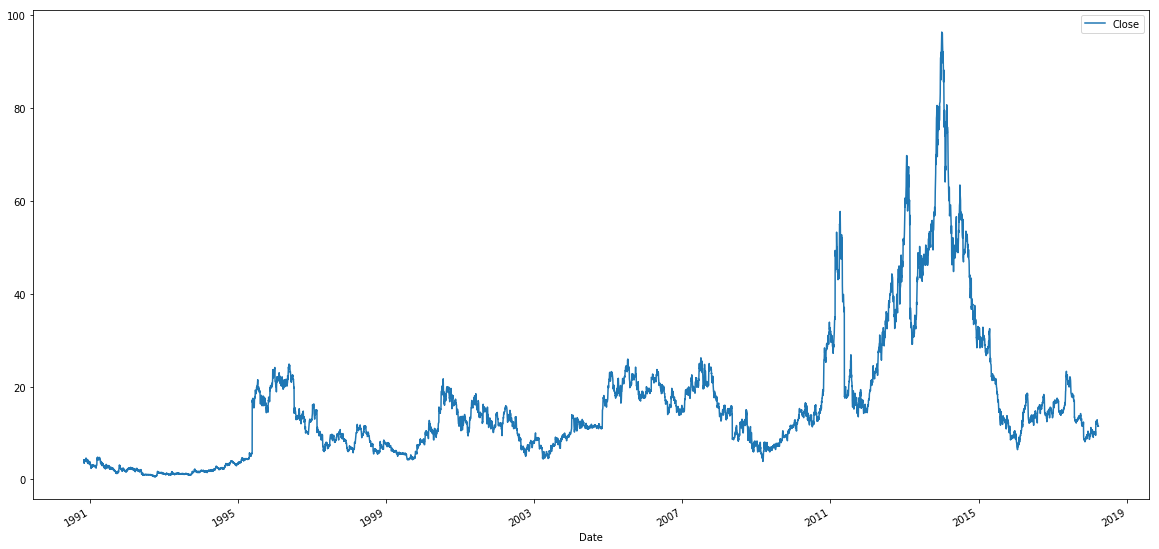

In [103]:
plt.figure()
stock_timeline_df[['Close']].plot(figsize=(20,10))

### Push Data to the Database

In [84]:
stock_timeline_df.to_sql('stocks_daily',con=engine,chunksize=1000,if_exists='append',index=False)

In [87]:
connection.commit()

In [89]:
cursor.execute("SELECT * FROM stocks_daily LIMIT 100")
results = cursor.fetchall()


In [118]:
cursor.execute("TRUNCATE TABLE stocks_daily")
connection.commit()

### Quick Detour: Working with Tuples

In [92]:
print(type(results[0]))
results[0]

<class 'tuple'>


(datetime.datetime(2018, 3, 27, 0, 0),
 11.57,
 11.78,
 11.35,
 11.51,
 1369681.0,
 0.0,
 1.0,
 11.57,
 11.78,
 11.35,
 11.51,
 1369681.0)

In [93]:
results[0][0]

datetime.datetime(2018, 3, 27, 0, 0)

### Quick Detour: Working with DateTimes

In [95]:
results[0][0].strftime('%Y-%m-%d %H:%M:%S')

'2018-03-27 00:00:00'

## Looping over Lists to Query an API

In [104]:
ticker_list = stock_tickers_df['Symbol'].tolist()

In [105]:
ticker_list[:5]

['DDD', 'MMM', 'WBAI', 'WUBA', 'AHC']

In [119]:
for ticker in ticker_list[:10]:
    base_url = 'https://www.quandl.com/api/v3/datasets/WIKI/' + ticker + '/data.json?api_key=' + api_key
    try:
        response = requests.get(base_url)
        response_json = response.json()
        headers = response_json['dataset_data']['column_names']
        data = response_json['dataset_data']['data']
        stock_timeline_df = pd.DataFrame(data, columns=headers)
        stock_timeline_df['Date'] = pd.to_datetime(stock_timeline_df['Date'])
        stock_timeline_df['Ticker'] = ticker
        stock_timeline_df.to_sql('stocks_daily',con=engine,chunksize=1000,if_exists='append',index=False)
        print("Ticker uploaded:",ticker)
    except Exception as ex:
        print(ticker)
        print(response_json)
        print(ex)

Ticker uploaded: DDD
Ticker uploaded: MMM
WBAI
{'quandl_error': {'code': 'QECx02', 'message': 'You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.'}}
'dataset_data'
WUBA
{'quandl_error': {'code': 'QECx02', 'message': 'You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.'}}
'dataset_data'
Ticker uploaded: AHC
Ticker uploaded: ATEN
AAC
{'quandl_error': {'code': 'QECx02', 'message': 'You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.'}}
'dataset_data'
Ticker uploaded: AIR
Ticker uploaded: AAN
ABB
{'quandl_error': {'code': 'QECx02', 'message': 'You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.'}}
'dataset_data'


### Check to see that data looks right

In [121]:
stocks_daily_df = pd.read_sql_query("SELECT * FROM stocks_daily",connection)
stocks_daily_df[:10]

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Ticker
0,2018-03-27,11.57,11.7800,11.35,11.51,1369681.0,0.0,1.0,11.57,11.7800,11.35,11.51,1369681.0,DDD
1,2018-03-26,11.66,11.8200,11.29,11.57,1731235.0,0.0,1.0,11.66,11.8200,11.29,11.57,1731235.0,DDD
2,2018-03-23,11.62,11.8000,11.31,11.43,2001250.0,0.0,1.0,11.62,11.8000,11.31,11.43,2001250.0,DDD
3,2018-03-22,11.80,12.0100,11.61,11.65,1544751.0,0.0,1.0,11.80,12.0100,11.61,11.65,1544751.0,DDD
4,2018-03-21,11.99,12.2500,11.86,12.00,1814216.0,0.0,1.0,11.99,12.2500,11.86,12.00,1814216.0,DDD
5,2018-03-20,12.03,12.2600,11.83,12.05,1271050.0,0.0,1.0,12.03,12.2600,11.83,12.05,1271050.0,DDD
6,2018-03-19,12.28,12.5700,11.79,12.06,2692517.0,0.0,1.0,12.28,12.5700,11.79,12.06,2692517.0,DDD
7,2018-03-16,12.98,13.1000,12.40,12.40,4533798.0,0.0,1.0,12.98,13.1000,12.40,12.40,4533798.0,DDD
8,2018-03-15,13.00,13.6999,12.75,12.86,8124538.0,0.0,1.0,13.00,13.6999,12.75,12.86,8124538.0,DDD
9,2018-03-14,12.03,12.5300,11.94,12.15,3855635.0,0.0,1.0,12.03,12.5300,11.94,12.15,3855635.0,DDD


In [125]:
stocks_daily_df.index = pd.to_datetime(stocks_daily_df['Date'])

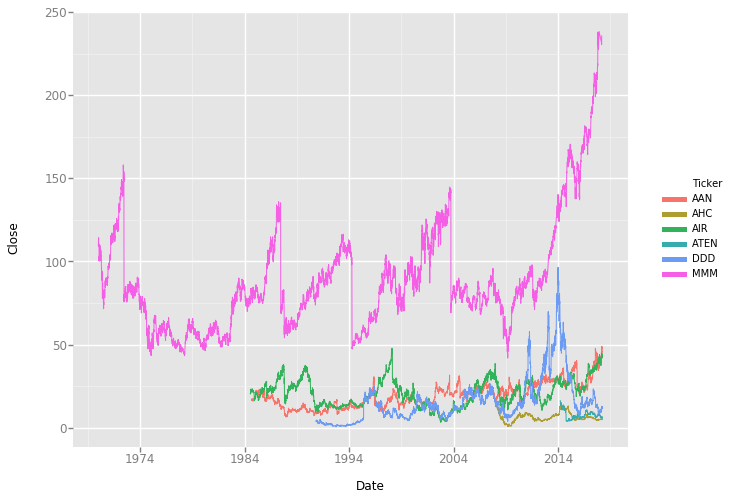

<ggplot: (316008873)>

In [128]:
from ggplot import *
ggplot(aes(x='Date', y='Close', color='Ticker'), data=stocks_daily_df) + geom_line()